<a href="https://colab.research.google.com/github/physicaone/loss_IG/blob/master/%5B210617%5Dvisual_results7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    base='drive/MyDrive'
except:
    base='Google Drive'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [14]:
n_hid_list=[1, 2, 4, 8, 10, 12, 14]
T_list=[1.47, 1.78, 2.3, 5.2, 16]
T_color=['red', 'orange', 'green', 'blue', 'purple']
n_hid_color=['red', 'orange', 'yellow', 'green', 'skyblue','blue', 'purple']
# re='_rearranged'
re=''

In [8]:
def get_hist(list00):
#     bins=range(int(min(list00)-1), int(max(list00)+1), 1)
    # bins=[0.001*(1.5**x) for x in range(29)]
    y1,x1,_ = plt.hist(list00, bins = 100, histtype='step')
    x1 = 0.5*(x1[1:]+x1[:-1])
    plt.close()
    return x1, y1

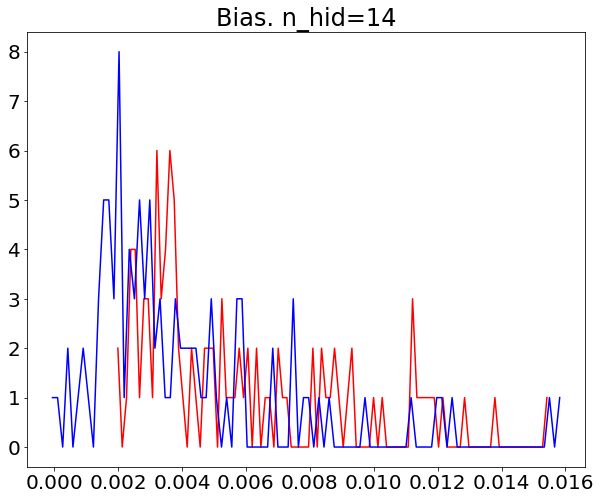

In [69]:
T=1.78
n_hid=10
x0, y0=get_hist(Biases[str(T)][str(n_hid)])

T=1.78
n_hid=12
x1, y1=get_hist(Biases[str(T)][str(n_hid)])


T=1.78
n_hid=14
x2, y2=get_hist(Biases[str(T)][str(n_hid)])
plt.figure(figsize=(10,8))

# plt.subplot(2, 4, 0)
plt.rcParams["font.size"] = "20"
plt.title('Bias. n_hid={n_hid}'.format(n_hid=n_hid))
plt.plot(x0, y0, c='r')
# plt.plot(x1, y1, c='g')
plt.plot(x2, y2, c='b')


In [15]:
Biases={}
for T in T_list:
    Biases[str(T)]={}
    S=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_T={T}_S_exact.pkl'.format(base=base, T=T))
    for n_hid in n_hid_list:
        Bias=[]
        FE=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_n_hid={n_hid}_T={T}_FE_exact{re}.pkl'.format(base=base, n_hid=n_hid, T=T, re=re))
        dE=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_n_hid={n_hid}_T={T}_dE_exact{re}.pkl'.format(base=base, n_hid=n_hid, T=T, re=re))
        FE_V=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_n_hid={n_hid}_T={T}_FE_V_exact{re}.pkl'.format(base=base, n_hid=n_hid, T=T, re=re))
        for m in range(10):
            for n in range(10):
                Bias.append(-S-FE['mn'][str(m)][str(n)]+FE_V['mn'][str(m)][str(n)])
        Biases[str(T)][str(n_hid)]=Bias

Variances={}
for T in T_list:
    Variances[str(T)]={}
    for n_hid in n_hid_list:
        Variance=[]
        dE10000=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_n_hid={n_hid}_T={T}_dE10000_exact{re}.pkl'.format(base=base, n_hid=n_hid, T=T, re=re))
        FE=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_n_hid={n_hid}_T={T}_FE_exact{re}.pkl'.format(base=base, n_hid=n_hid, T=T, re=re))

        for i in range(100):
            i=str(i).zfill(2)
            for j in range(100):
                j=str(j).zfill(2)
                if i!=j:
                    Variance.append(dE10000[i][j]-FE['mn'][j[0]][j[1]]+FE['mn'][i[0]][i[1]])
        Variances[str(T)][str(n_hid)]=Variance

JSs={}
for T in T_list:
    JSs[str(T)]={}
    for n_hid in n_hid_list:
        JS=[]
        dE10000=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_n_hid={n_hid}_T={T}_dE10000_exact{re}.pkl'.format(base=base, n_hid=n_hid, T=T, re=re))
        for i in range(100):
            i=str(i).zfill(2)
            for j in range(100):
                j=str(j).zfill(2)
                if i>j:
                    if i[0]==j[0]:
                        # if (dE10000[i][j]+dE10000[j][i])<0:
                        #     JS.append(0)
                        # else:
                        JS.append(0.5*(dE10000[i][j]+dE10000[j][i]))
                        # JS.append(dE10000[i][j]-FE['mn'][j[0]][j[1]]+FE['mn'][i[0]][i[1]])
        JSs[str(T)][str(n_hid)]=JS  

FileNotFoundError: ignored

In [16]:
Bias_means=[]
Variance_means=[]
JS_means=[]
for T in T_list:
    Bias_means_tmp=[]
    Variance_means_tmp=[]
    JS_means_tmp=[]
    for n_hid in n_hid_list:
        Bias_means_tmp.append(np.mean(Biases[str(T)][str(n_hid)]))
        # Variance_means_tmp.append(np.mean(Variances[str(T)][str(n_hid)]))
        # JS_means_tmp.append(np.mean(JSs[str(T)][str(n_hid)]))
    Bias_means.append(Bias_means_tmp)
    # Variance_means.append(Variance_means_tmp)
    # JS_means.append(JS_means_tmp)

IndexError: ignored

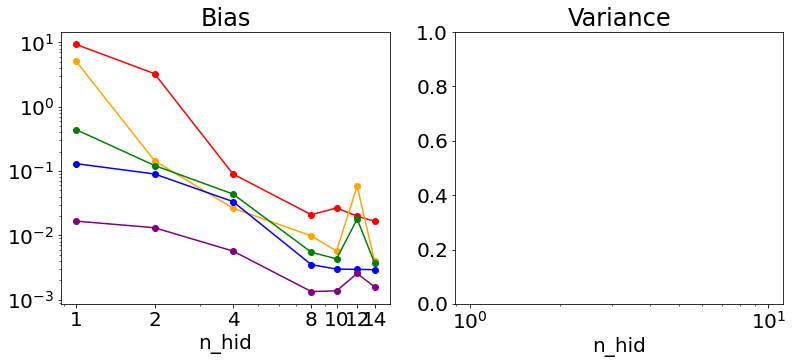

In [17]:
x_mark=n_hid_list
y_mark=[0,5,10,15,20]

plt.figure(figsize=(20,5))
alpha=0.5
plt.subplot(1, 3, 1)
plt.rcParams["font.size"] = "20"
plt.title('Bias{re}'.format(re=re))
plt.xscale('log')
plt.xlabel('n_hid')
# plt.ylim(y_mark[0],y_mark[-1])

plt.yscale('log')
for i in range(len(T_list)):
    plt.plot(n_hid_list, Bias_means[i], '-o', c=T_color[i], label = T_list[i])

plt.xticks(x_mark,x_mark)
# plt.yticks(y_mark, y_mark)

plt.subplot(1, 3, 2)
plt.rcParams["font.size"] = "20"
plt.title('Variance{re}'.format(re=re))
plt.xscale('log')
plt.xlabel('n_hid')

# plt.yscale('log')
for i in range(len(T_list)):
    plt.plot(n_hid_list, JS_means[i], '-o', c=T_color[i], label = T_list[i])
plt.xticks(x_mark,x_mark)
# plt.yticks(y_mark, y_mark)
# plt.ylim(y_mark[0],y_mark[-1])

plt.subplot(1, 3, 3)
plt.rcParams["font.size"] = "20"
plt.title('Bias+Variance{re}'.format(re=re))
plt.xscale('log')
# plt.yscale('log')
for i in range(len(T_list)):
    plt.plot(n_hid_list, (np.array(Bias_means)+np.array(Variance_means))[i], '-o', c=T_color[i], label = T_list[i])

plt.xlabel('n_hid')
# plt.ylim(y_mark[0],y_mark[-1])
plt.xticks(x_mark,x_mark)
# plt.yticks(y_mark, y_mark)
plt.legend(T_list,  bbox_to_anchor=(1, 1), 
        ncol=1, fancybox=True, shadow=True)

In [93]:
n_hid_list=[1,2,4,8,10]
re=''
T_list=[1.47,1.78,2.3,5.2,16]

In [83]:
def get_hist(list00):
#     bins=range(int(min(list00)-1), int(max(list00)+1), 1)
    # bins=[0.001*(1.5**x) for x in range(29)]
    y1,x1,_ = plt.hist(list00, bins = 100, histtype='step')
    x1 = 0.5*(x1[1:]+x1[:-1])
    plt.close()
    return x1, y1

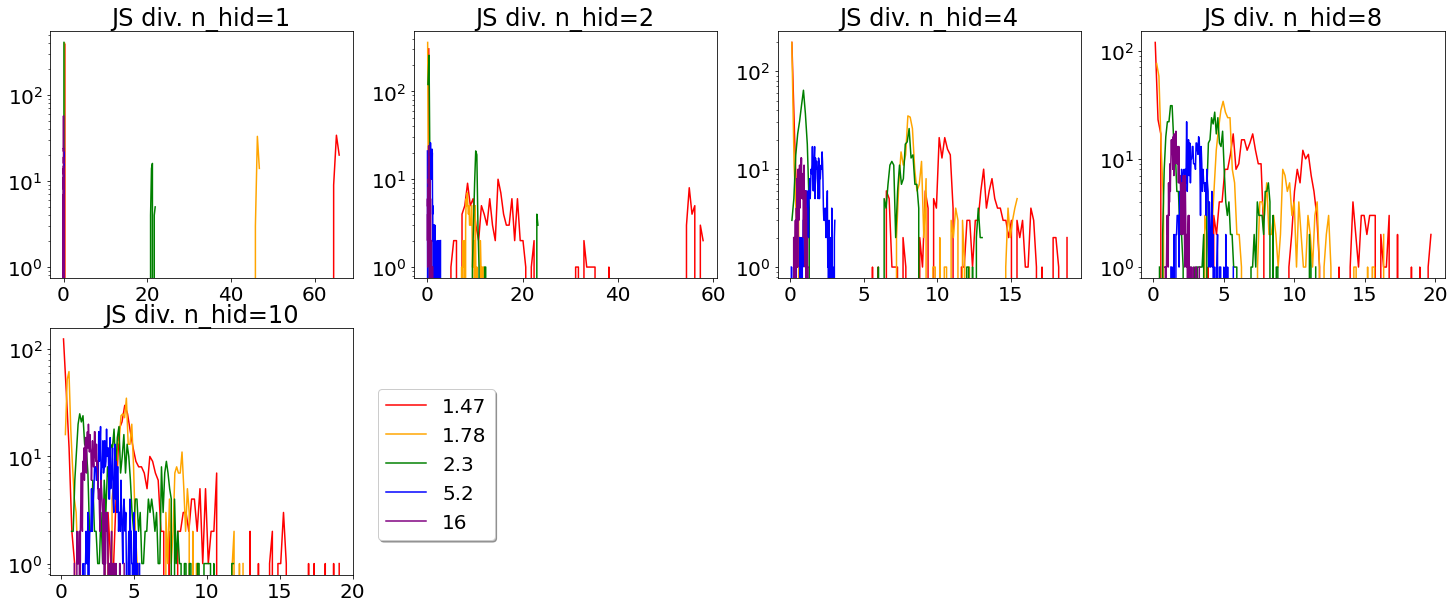

In [126]:
x_dict={}
y_dict={}
for T in T_list:
    x_dict[str(T)]={}
    y_dict[str(T)]={}
    for n_hid in n_hid_list:
        x1, y1=get_hist(JSs[str(T)][str(n_hid)])
        x_dict[str(T)][str(n_hid)]=x1
        y_dict[str(T)][str(n_hid)]=y1

plt.figure(figsize=(25,10))

for i in range(1, len(n_hid_list)+1):
    n_hid=str(n_hid_list[i-1])
    plt.subplot(2, 4, i)
    plt.rcParams["font.size"] = "20"
    plt.title('JS div. n_hid={n_hid}'.format(n_hid=n_hid))
    for t in range(len(T_list)):
        plt.plot(x_dict[str(T_list[t])][str(n_hid)], y_dict[str(T_list[t])][str(n_hid)], c=T_color[t], label = T_list[t])
    

    plt.yscale('log')
    # plt.xlim(0, 80)
    # plt.ylim(0, 60)
plt.legend(loc='lower right', bbox_to_anchor=(1.5, 0.1), 
        ncol=1, fancybox=True, shadow=True)
    # plt.ylim(1, 10000)

In [ ]:
n_vis=9
Weights={}
for T in T_list:
    Weights[str(T)]={}
    for n_hid in n_hid_list:
        Weight=[]
        params=pd.read_pickle('{base}/loss_IG/3*3/state_dict/n_hid={n_hid}_T={T}_mn.pkl'.format(base=base, n_hid=n_hid, T=T))
        for m in range(10):
            for n in range(10):
                Weight=Weight+params[str(m)][str(n)]['W'].view(n_hid*n_vis).tolist()
        Weights[str(T)][str(n_hid)]=Weight

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled

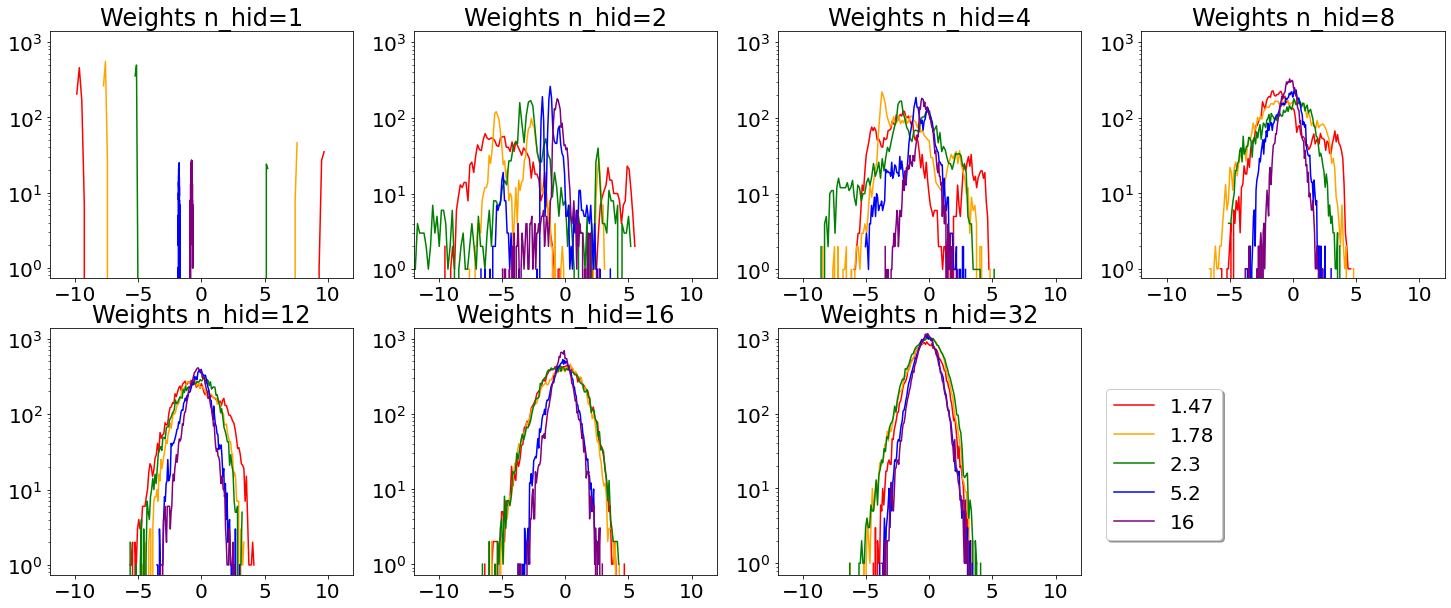

In [ ]:
x_dict={}
y_dict={}
for T in T_list:
    x_dict[str(T)]={}
    y_dict[str(T)]={}
    for n_hid in n_hid_list:
        x1, y1=get_hist(Weights[str(T)][str(n_hid)])
        x_dict[str(T)][str(n_hid)]=x1
        y_dict[str(T)][str(n_hid)]=y1

plt.figure(figsize=(25,10))

for i in range(1, len(n_hid_list)+1):
    n_hid=str(n_hid_list[i-1])
    plt.subplot(2, 4, i)
    plt.rcParams["font.size"] = "20"
    plt.title('Weights n_hid={n_hid}'.format(n_hid=n_hid))
    for t in range(len(T_list)):
        plt.plot(x_dict[str(T_list[t])][str(n_hid)], y_dict[str(T_list[t])][str(n_hid)], c=T_color[t], label = T_list[t])
    

    plt.yscale('log')
    plt.xlim(-12, 12)
    plt.ylim(0, 1400)
plt.legend(loc='lower right', bbox_to_anchor=(1.5, 0.1), 
        ncol=1, fancybox=True, shadow=True)
    # plt.ylim(1, 10000)